<a href="https://colab.research.google.com/github/myungjinma/acorn_python/blob/main/0811_66%EC%9D%BC%EC%B0%A8_ML(iris%5Bcross_val_score%2C_GridSearchCV%5D%2Cmglearn_2%EA%B3%BC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cross_val_score 를 for문으로 실행하여 , score가 최고인 경우의 n_neighbors 찾아 내기

조건 :


```
neighbors = [ k for k in range(50) if k%2 !=0]

  for neighbor in neighbors:

  cv =5

```
  
n_neighbors 별 score 구하고 그래프 그려보기

같은 조건으로 GridSearchCV 수행하고 1번과의 결과 비교해보기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

#Assign column names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

#Read dataset to pandas dataframe
dataset = pd.read_csv(url, names = names)

dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Preprocessing
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
neighbors = [k for k in range(50) if k%2 !=0]

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [6]:
cv_scores = []

In [7]:
for k in neighbors:
  estimator = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(estimator, X_train, y_train, cv=5, scoring= 'accuracy')
  cv_scores.append(scores.mean())

In [8]:
cv_scores

[0.9333333333333333,
 0.9333333333333333,
 0.9666666666666666,
 0.9583333333333334,
 0.95,
 0.95,
 0.9583333333333334,
 0.95,
 0.9333333333333332,
 0.95,
 0.95,
 0.9416666666666668,
 0.9333333333333333,
 0.9416666666666668,
 0.9416666666666668,
 0.9166666666666667,
 0.9166666666666666,
 0.9,
 0.9,
 0.9,
 0.9083333333333334,
 0.9,
 0.9,
 0.8666666666666666,
 0.8666666666666666]

In [9]:
max_score = max(cv_scores)
print(max_score)
idx = cv_scores.index(max_score)
neighbors[idx]

0.9666666666666666


5

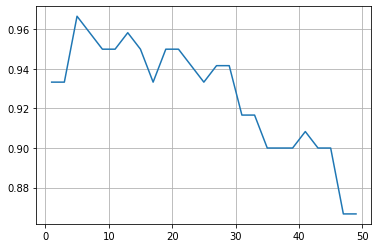

In [10]:
plt.plot(neighbors,cv_scores)
plt.grid()

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
params = {'n_neighbors' : neighbors}

In [13]:
knn = KNeighborsClassifier()

In [14]:
grid = GridSearchCV(knn, param_grid = params, scoring= 'accuracy', cv=5)

In [16]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49]},
             scoring='accuracy')

In [17]:
grid.best_params_

{'n_neighbors': 5}

In [18]:
grid.best_score_

0.9666666666666666

In [19]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors = k_range)

#defining parameter range
grid = GridSearchCV(knn, param_grid, cv=5 , scoring='accuracy')

#fitting the model for grid search
grid_search = grid.fit(X_train, y_train)

In [20]:
param_grid

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30]}

In [21]:
grid.best_params_

{'n_neighbors': 5}

In [22]:
grid.best_score_

0.9666666666666666

n차원 공간상의 데이터 집단을 구분하는 초평면(Optimal Hyper Plane)을 찾아 분류를 실행

In [23]:
#SVM
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [24]:
pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 29.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=77edf2475b778334d154b10e367b8ef3f34048b005e8e4cf534a0e4be23b405b
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [25]:
import mglearn

X,y = mglearn.datasets.make_forge()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [26]:
X

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [27]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


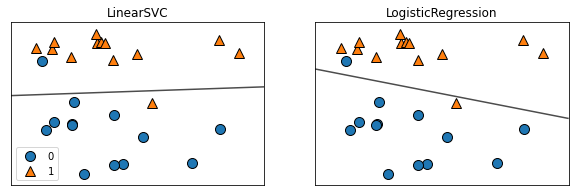

In [29]:
import matplotlib.pyplot as plt

fig ,axes = plt.subplots(1,2, figsize = (10,3))

for model, ax in zip([LinearSVC(max_iter=500), LogisticRegression()], axes):
  clf = model.fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X , fill=False, eps =0.5, ax= ax, alpha=0.7)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y , ax=ax)
  ax.set_title(clf.__class__.__name__)

axes[0].legend()

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


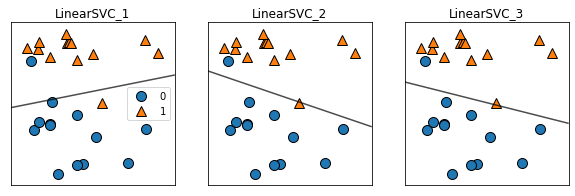

In [31]:
fig ,axes = plt.subplots(1,3, figsize = (10,3))

i = 0

for model, ax in zip([LinearSVC(max_iter=5000, C= 0.01), LinearSVC(max_iter=5000, C=10), LinearSVC(max_iter=500, C=1000)], axes):
  i = i+1
  clf = model.fit(X,y)
  mglearn.plots.plot_2d_separator(clf, X , fill=False, eps =0.5, ax= ax, alpha=0.7)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y , ax=ax)
  ax.set_title(clf.__class__.__name__ + '_' + str(i))

axes[0].legend()

In [32]:
import numpy as np
X = np.array(([3,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3]))
y = np.array([-1, -1, -1, 1,1,1])

y = x-3

x2 = x1 -3

$$
x_2 = x_1 -3
$$
$$
x_1 + (-1)\times x_2 - 3 =0
$$
$$
(1/-1)(x_1/ x_2) -3 = 0
$$
$$
∴w= (1, -1), b=-3
$$

a = -w_0 /w_1

In [33]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(X, y)
print('w = ', clf.coef_)
print('b = ', clf.intercept_)
print('Indices of support vectorm = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)

w =  [[ 0.25 -0.25]]
b =  [-0.75]
Indices of support vectorm =  [2 3]
Support vectors =  [[ 2.  3.]
 [ 6. -1.]]
Number of support vectors for each class =  [1 1]


a = -w_0/ w_1

a = -(1/4)(-1/4) =1